True Gamma: 1
Fitted Gamma: 0.00048571085440573495
True Sigma: 2
Fitted Sigma: -0.07986816758219563


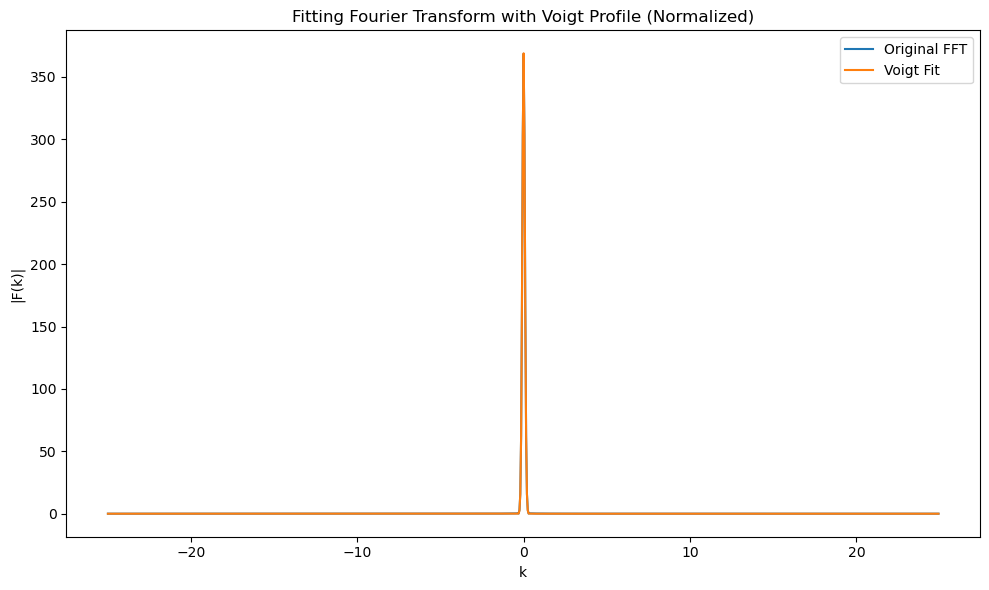

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.special import wofz

# Define the parameters
gamma_true = 1
sigma_true = 2

# Define the range of x values
x = np.linspace(-10, 10, 1000)

# Define the functions
exp_func = np.exp(-gamma_true * x)
gaussian_func = 1 / (np.sqrt(2 * np.pi) * sigma_true) * np.exp(-x**2 / (2 * sigma_true**2))

# Calculate the product of the functions
product_func = exp_func * gaussian_func

# Perform the Fourier transform of the product function
k = np.fft.fftfreq(len(x), x[1] - x[0])
product_func_fft = np.fft.fft(product_func)
product_func_fft  = np.fft.fftshift(product_func_fft)
k = np.fft.fftshift(k)

# Voigt profile function
def voigt(x, amplitude, center, sigma, gamma):
    z = (x - center + 1j * gamma) / (sigma * np.sqrt(2))
    return amplitude * np.real(wofz(z).real)

# Define the residual function for least squares optimization
def residual(params, k, fft_data, fft_amplitude):
    amplitude, center, sigma, gamma = params
    voigt_fit = voigt(k, amplitude, center, sigma, gamma)
    return (np.abs(voigt_fit) * fft_amplitude) - np.abs(fft_data)

# Initial guess for the parameters [amplitude, center, sigma, gamma]
initial_params = [1, 0, 1, 1]

# Calculate the amplitude of the original FFT
fft_amplitude = np.max(np.abs(product_func_fft))

# Perform least squares optimization to find optimal parameters
fit_result = least_squares(residual, initial_params, args=(k, product_func_fft, fft_amplitude))

# Extract the optimal parameters
amplitude_fit, center_fit, sigma_fit, gamma_fit = fit_result.x

print("True Gamma:", gamma_true)
print("Fitted Gamma:", gamma_fit)
print("True Sigma:", sigma_true)
print("Fitted Sigma:", sigma_fit)

# Generate the Voigt fit for the Fourier transform
fit_result_fft = voigt(k, amplitude_fit, center_fit, sigma_fit, gamma_fit) * fft_amplitude

# Plot the Fourier transform and the Voigt fit
plt.figure(figsize=(10, 6))

plt.plot(k, np.abs(product_func_fft), label='Original FFT')
plt.plot(k, np.abs(fit_result_fft), label='Voigt Fit')
plt.title('Fitting Fourier Transform with Voigt Profile (Normalized)')
plt.xlabel('k')
plt.ylabel('|F(k)|')
plt.legend()

plt.tight_layout()
plt.show()
